### Feature preprocessing

#### FinBERT Score

In [1]:
import pandas as pd
import numpy as np

fd_speech = pd.read_csv('../../Data/Final/federal_sentiment.csv', index_col = 0)
fd_speech.index = pd.to_datetime(fd_speech.index).strftime('%Y-%m')
fd_speech.index = pd.to_datetime(fd_speech.index)

fd_press = pd.read_csv('../../Data/Final/press_sentiment.csv', index_col = 0)
fd_press.index = pd.to_datetime(fd_press.index).strftime('%Y-%m')
fd_press.index = pd.to_datetime(fd_press.index)

invest_com = pd.read_csv('../../Data/Final/invest_com_sentiment.csv', index_col = 0)
invest_com.index = pd.to_datetime(invest_com.index).strftime('%Y-%m')

usdt = pd.read_csv('../../Data/Final/USDT_sentiment.csv', index_col = 0)
usdt.index = pd.to_datetime(usdt.index).strftime('%Y-%m')

ft = pd.read_csv('../../Data/Final/ft_sentiment.csv', index_col = 0)
ft.index = pd.to_datetime(ft.index).strftime('%Y-%m')

In [2]:
fd_press

,Negative,Neutral,sentimental_score
Date,,,
2006-01-01,0.997587,0.001521,-0.995934
2006-02-01,0.995709,0.000902,-0.991869
2006-03-01,0.924128,0.075699,-0.886105
2006-04-01,0.950914,0.000196,-0.901927
2006-05-01,0.911347,0.088517,-0.866952
...,...,...,...
2023-07-01,0.811841,0.001076,-0.624220
2023-08-01,0.904288,0.054327,-0.835740
2023-09-01,0.988094,0.011596,-0.981985


In [3]:
invest_com

,Positive,Negative,Neutral,sentimental_score
Date,,,,
2023-11,0.159651,0.646914,0.193435,-0.390545
2023-10,0.160515,0.635881,0.203604,-0.373564
2023-09,0.151963,0.656168,0.191869,-0.408270
2023-08,0.122717,0.711143,0.166141,-0.505356
2023-07,0.103711,0.745990,0.150299,-0.567130
2023-06,0.094562,0.734463,0.170975,-0.554413
2023-05,0.138747,0.724805,0.136448,-0.517834
2023-04,0.130142,0.714174,0.155683,-0.506190
2023-03,0.131547,0.734119,0.134333,-0.535405


In [4]:
ft

,Positive,Negative,Neutral,sentimental_score
Date,,,,
2023-11,0.174408,0.688674,0.136918,-0.445808
2023-10,0.241055,0.525816,0.233129,-0.168197
2023-09,0.224177,0.573975,0.201848,-0.248874
2023-08,0.144376,0.757819,0.097805,-0.564540
2023-07,0.298952,0.569860,0.131188,-0.205313
2023-06,0.085023,0.727201,0.187776,-0.548289
2023-05,0.242027,0.627649,0.130324,-0.320459
2023-04,0.289253,0.593404,0.117343,-0.245479
2023-03,0.262735,0.627765,0.109500,-0.310280


In [5]:
sum_mat = usdt.add(invest_com, fill_value = 0).add(ft, fill_value = 0)

In [6]:
sum_mat.index = pd.to_datetime(sum_mat.index)

In [7]:
sum_mat.loc['2021-11' : ] = sum_mat.loc['2021-11' : ]/3

In [8]:
sum_mat.loc['2018-12' : '2021-10'] =  sum_mat.loc['2018-12' : '2021-10'] / 2

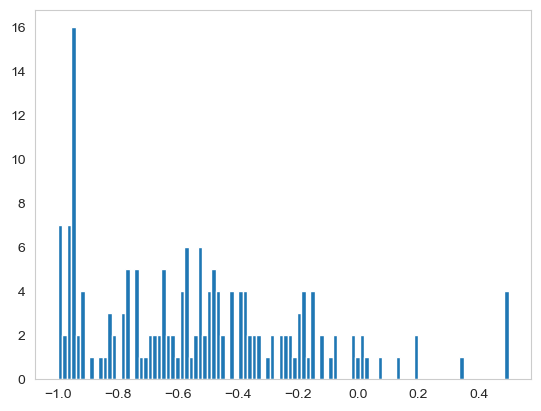

In [9]:
import matplotlib.pyplot as plt
plt.hist(sum_mat.sentimental_score, bins = 100)
plt.grid(False)
plt.show()

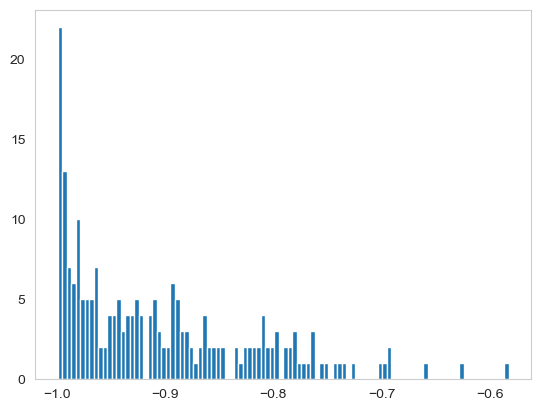

In [10]:
plt.hist(fd_press.sentimental_score, bins = 100)
plt.grid(False)
plt.show()

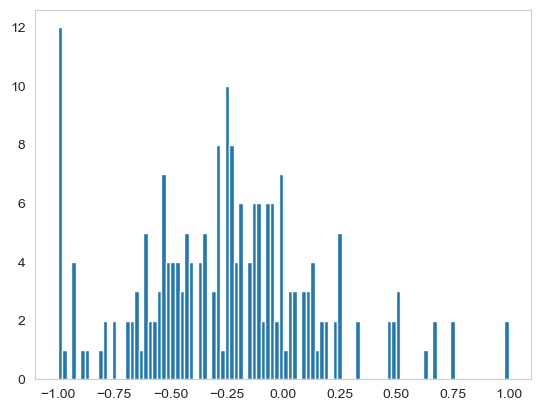

In [11]:
plt.hist(fd_speech.sentimental_score, bins = 100)
plt.grid(False)
plt.show()

#### Topic Score

In [12]:
press_topic = pd.read_csv('../../Data/Final/press_topic_score.csv', index_col = 0)
press_topic.index = pd.to_datetime(press_topic.index).strftime('%Y-%m')
press_topic.index = pd.to_datetime(press_topic.index)
press_topic

,topic0_press,topic1_press,topic2_press
date,,,
2006-01-01,0.308782,0.569619,0.114973
2006-02-01,0.407946,0.395169,0.192730
2006-03-01,0.288352,0.624081,0.080582
2006-04-01,0.291533,0.640836,0.062028
2006-05-01,0.216857,0.612323,0.165448
...,...,...,...
2023-07-01,0.446593,0.429489,0.119396
2023-08-01,0.545628,0.413764,0.035803
2023-09-01,0.184178,0.514515,0.294351


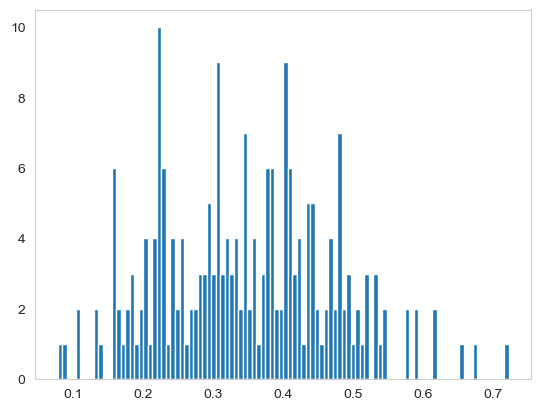

In [13]:
plt.hist(press_topic.topic0_press, bins = 100)
plt.grid(False)
plt.show()

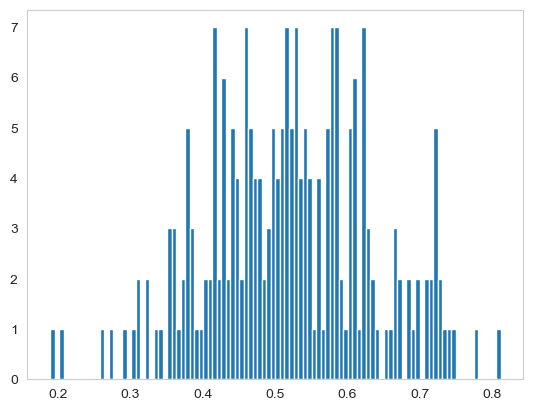

In [14]:
plt.hist(press_topic.topic1_press, bins = 100)
plt.grid(False)
plt.show()

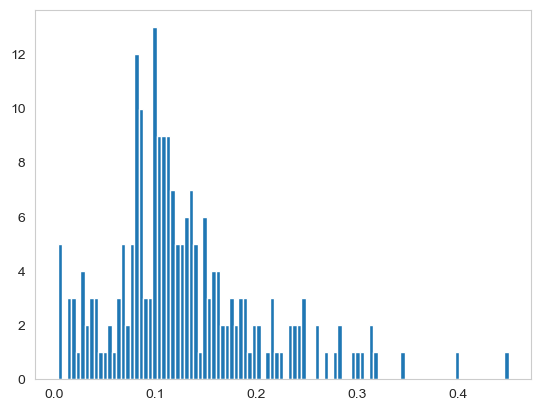

In [15]:
plt.hist(press_topic.topic2_press, bins = 100)
plt.grid(False)
plt.show()

In [16]:
speech_topic = pd.read_csv('../../Data/Final/topic_score.csv', index_col = 0)
speech_topic.index = pd.to_datetime(speech_topic.index).strftime('%Y-%m')
speech_topic.index = pd.to_datetime(speech_topic.index)
speech_topic

,topic0_speech,topic1_speech,topic2_speech
date,,,
2006-01-01,0.877139,0.000000,0.122153
2006-02-01,0.460550,0.380456,0.158873
2006-03-01,0.326302,0.566256,0.106156
2006-04-01,0.352781,0.403970,0.242916
2006-05-01,0.109393,0.541682,0.347114
...,...,...,...
2023-07-01,0.333175,0.334658,0.331842
2023-08-01,0.879264,0.000000,0.119994
2023-09-01,0.343674,0.031071,0.623029


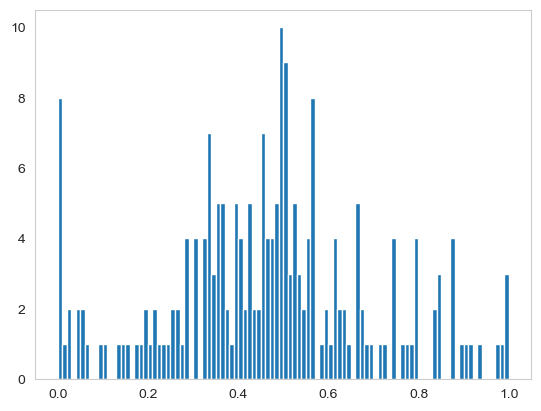

In [17]:
plt.hist(speech_topic.topic0_speech, bins = 100)
plt.grid(False)
plt.show()

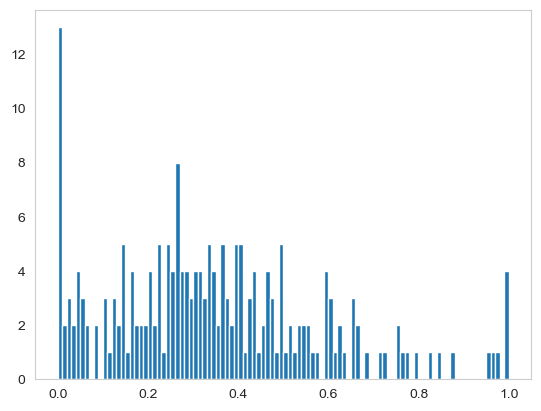

In [18]:
plt.hist(speech_topic.topic1_speech, bins = 100)
plt.grid(False)
plt.show()

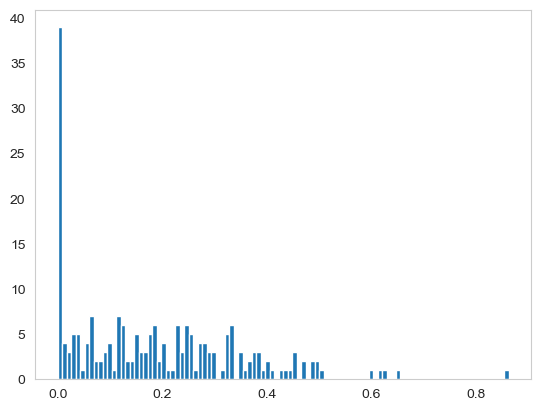

In [19]:
plt.hist(speech_topic.topic2_speech, bins = 100)
plt.grid(False)
plt.show()

#### GDP Data

In [20]:
gdp = pd.read_csv('../../Data/GDP.csv',index_col = 0)
gdp.index = pd.to_datetime(gdp.index).strftime('%Y-%m')
gdp.index = pd.to_datetime(gdp.index)
gdp

,GDP
DATE,
2004-01-01,11923.447
2004-04-01,12112.815
2004-07-01,12305.307
2004-10-01,12527.214
2005-01-01,12767.286
...,...
2022-07-01,25994.639
2022-10-01,26408.405
2023-01-01,26813.601


In [21]:
cpi = pd.read_csv('../../Data/CPIAUCSL.csv',index_col = 0)
cpi.index = pd.to_datetime(cpi.index).strftime('%Y-%m')
cpi.index = pd.to_datetime(cpi.index)
cpi

,CPIAUCSL
DATE,
2004-01-01,186.300
2004-02-01,186.700
2004-03-01,187.100
2004-04-01,187.400
2004-05-01,188.200
...,...
2023-06-01,303.841
2023-07-01,304.348
2023-08-01,306.269


In [22]:
gdp_rate = np.log(gdp / gdp.shift(4)).dropna()
cpi_rate = np.log(cpi / cpi.shift(12)).dropna()

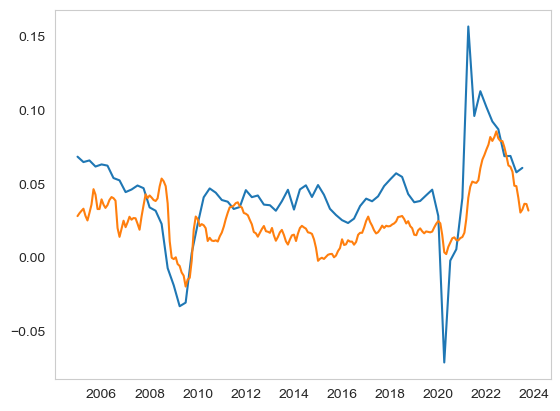

In [23]:
import matplotlib.pyplot as plt
plt.plot(gdp_rate)
plt.plot(cpi_rate)
plt.grid(False)

GDP 결측치 : proportional denton method

In [24]:
from statsmodels.tsa.interp.denton import dentonm

benchmarked = dentonm(cpi_rate.cumsum(), gdp_rate.cumsum(), freq = "qm")

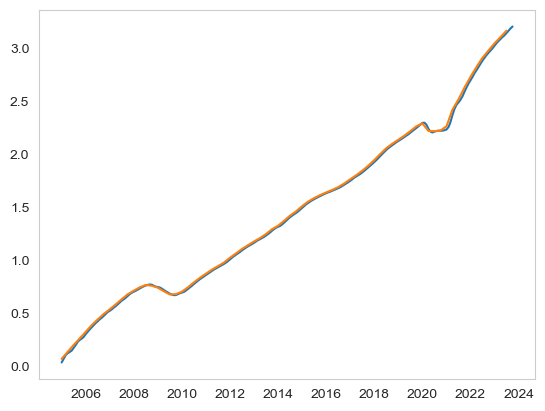

In [25]:
plt.plot(pd.Series(benchmarked * 3, index = cpi_rate.index))
plt.plot(gdp_rate.cumsum())
plt.grid(False)

In [26]:
target_gdp = (pd.Series(benchmarked, index = cpi_rate.index) - pd.Series(benchmarked, index = cpi_rate.index).shift(1)).dropna() * 3
target_gdp.index = target_gdp.index.strftime('%Y-%m')
target_gdp.index = pd.to_datetime(target_gdp.index)

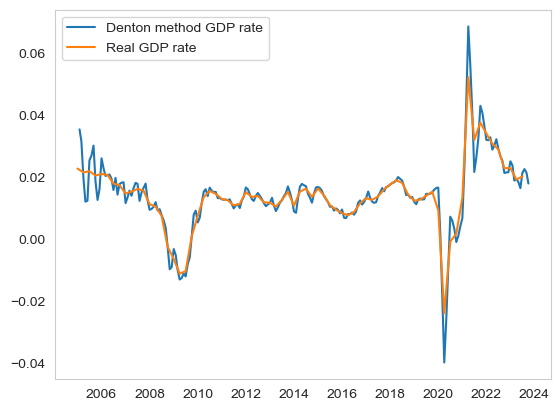

In [27]:
plt.plot(target_gdp, label = 'Denton method GDP rate')
plt.plot(gdp_rate / 3, label = 'Real GDP rate')
plt.legend()
plt.grid(False)
plt.show()

In [28]:
from statsmodels.tsa.statespace.mlemodel import MLEModel

def kalman_smoothing(close : pd.Series, 
                     q : float, dt : float = 1.0, s : float = 0.5,
                     A : np.array = np.array([[1]]), 
                     Q : np.array = np.array([[1]]), 
                     H : np.array = np.array([[1]]), 
                     R : np.array = np.eye(1),
                     m0 : np.array = np.array([[1]]),
                     P0 : np.array = np.eye(1),
                     k_state : int = 1) -> pd.DataFrame :
    Q = q * Q
    R = s ** 2 * R

    kf = MLEModel(close, k_states = k_state)
    kf._state_names = ['x1']
    kf['design'] = H
    kf['obs_cov'] = R
    kf['transition'] = A
    kf['selection'] = np.eye(1)
    kf['state_cov'] = Q

    kf.initialize_known(A @ m0[:, 0], A @ P0 @ A.T + Q)
    res = kf.smooth(params = [])
    output = pd.DataFrame(res.states.smoothed.x1.values, index = close.index, columns = ['smoothered'])
    
    return output

In [29]:
kalman_smoothed = kalman_smoothing(target_gdp.cumsum(), q = 0.1)

/Users/junghunlee/anaconda3/envs/Webscraping/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
gdp_target = kalman_smoothed.diff()

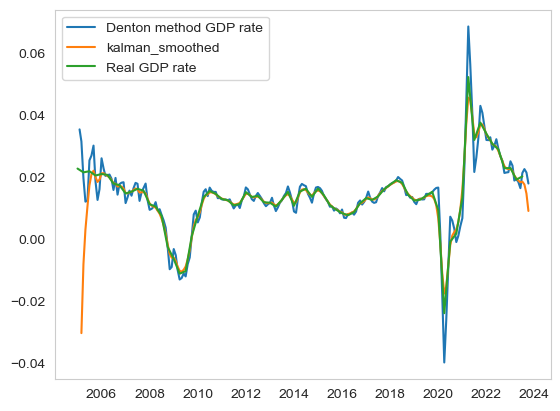

In [31]:
plt.plot(target_gdp, label = 'Denton method GDP rate')
plt.plot(gdp_target, label = 'kalman_smoothed')
plt.plot(gdp_rate / 3, label = 'Real GDP rate')
plt.legend()
plt.grid(False)
plt.show()

#### Federal Funds Rate

In [32]:
ffr = pd.read_csv('../../Data/DFF.csv', index_col = 0) * 0.01
ffr.index = pd.to_datetime(ffr.index)
ffr = ffr.resample('M').mean()
ffr.index = ffr.index.strftime('%Y-%m')
ffr.index = pd.to_datetime(ffr.index)
ffr

,DFF
DATE,
2005-01-01,0.022794
2005-02-01,0.025018
2005-03-01,0.026290
2005-04-01,0.027850
2005-05-01,0.030026
...,...
2023-07-01,0.051200
2023-08-01,0.053300
2023-09-01,0.053300


#### Unemployment Rate

In [33]:
unemploy = pd.read_csv('../../Data/UNRATE.csv', index_col = 0) * 0.01
unemploy.index = pd.to_datetime(unemploy.index).strftime('%Y-%m')
unemploy.index = pd.to_datetime(unemploy.index)
unemploy

,UNRATE
DATE,
2005-01-01,0.053
2005-02-01,0.054
2005-03-01,0.052
2005-04-01,0.052
2005-05-01,0.051
...,...
2023-06-01,0.036
2023-07-01,0.035
2023-08-01,0.038


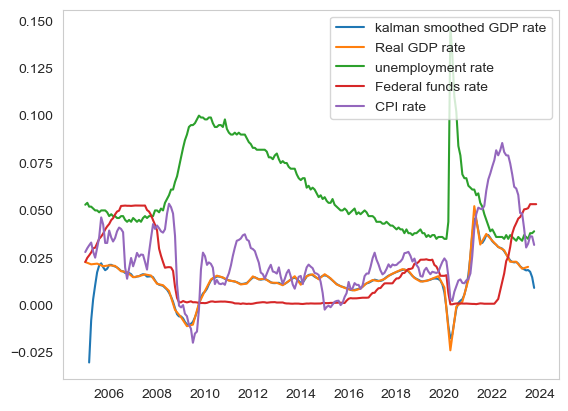

In [34]:
plt.plot(gdp_target, label = 'kalman smoothed GDP rate')
plt.plot(gdp_rate / 3, label = 'Real GDP rate')
plt.plot(unemploy, label = 'unemployment rate')
plt.plot(ffr, label = 'Federal funds rate')
plt.plot(cpi_rate, label = 'CPI rate')
plt.legend()
#(sentiment['sentimental_score'] * 0.1).plot(label = 'federal sentiment score')
plt.grid(False)
plt.show()

In [35]:
fd_speech

,Positive,Negative,Neutral,sentimental_score
Date,,,,
2006-01-01,7.971052e-08,2.516444e-07,1.000000,0.500000
2006-02-01,2.134020e-01,4.994306e-01,0.287167,-0.142445
2006-03-01,2.156177e-01,5.577889e-01,0.226593,-0.228875
2006-04-01,4.671889e-02,4.433666e-01,0.509914,-0.141691
2006-05-01,1.709526e-04,6.226610e-01,0.377168,-0.433906
...,...,...,...,...
2023-07-01,5.476058e-02,6.210716e-01,0.324168,-0.404227
2023-08-01,5.046593e-04,7.823840e-01,0.217111,-0.673324
2023-09-01,1.012808e-03,6.145024e-01,0.384485,-0.421247


#### NASDAQ

In [36]:
import yfinance as yf
nasdaq_ticker = '^IXIC'
nasdaq_data = yf.Ticker(nasdaq_ticker)
nasdaq_df = nasdaq_data.history(start = '2007-01-01', end = '2023-12-01')
nasdaq_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-01-03 00:00:00-05:00,2429.719971,2454.620117,2394.659912,2423.159912,2435280000,0.0,0.0
2007-01-04 00:00:00-05:00,2423.820068,2460.510010,2413.750000,2453.429932,2104210000,0.0,0.0
2007-01-05 00:00:00-05:00,2445.070068,2445.070068,2420.590088,2434.250000,2060360000,0.0,0.0
2007-01-08 00:00:00-05:00,2435.250000,2445.629883,2421.129883,2438.199951,1905620000,0.0,0.0
2007-01-09 00:00:00-05:00,2443.260010,2449.870117,2423.560059,2443.830078,2144160000,0.0,0.0


In [37]:
nasdaq = np.log(nasdaq_df.resample('M').last() / nasdaq_df.resample('M').last().shift(1)).iloc[:,:-2].dropna()

In [38]:
nasdaq.index = pd.to_datetime(nasdaq.index.strftime('%Y-%m'))

#### Feature Matrix

In [39]:
feature_matrix = pd.concat(
    [
        fd_speech['sentimental_score'].fillna(method = 'ffill'),
        fd_press['sentimental_score'].fillna(method = 'ffill'),
        sum_mat['sentimental_score'].fillna(method = 'ffill'),
        press_topic.fillna(method = 'ffill'),
        speech_topic.fillna(method = 'ffill'),
        ffr,
        unemploy,
        cpi_rate,
        nasdaq['Close'],
        target_gdp
    ],
    axis = 1
)

feature_matrix.columns = ['FED_sentiment','press_sentiment','news_sentiment',
                          'press_topic1','press_topic2','press_topic3',
                          'speech_topic1','speech_topic2','speech_topic3',
                          'federal_funds_rate','unemployment_rate','cpi','nasdaq','gdp_rate']

In [40]:
feature_matrix

,FED_sentiment,press_sentiment,news_sentiment,press_topic1,press_topic2,press_topic3,speech_topic1,speech_topic2,speech_topic3,federal_funds_rate,unemployment_rate,cpi,nasdaq,gdp_rate
2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022794,0.053,0.028052,NaN,NaN
2005-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025018,0.054,0.030073,NaN,0.035406
2005-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026290,0.052,0.031565,NaN,0.031518
2005-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027850,0.052,0.033065,NaN,0.019657
2005-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030026,0.051,0.028289,NaN,0.012154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,-0.404227,-0.624220,-0.373797,0.446593,0.429489,0.119396,0.333175,0.334658,0.331842,0.051200,0.035,0.032458,0.039680,0.021374
2023-08-01,-0.673324,-0.835740,-0.484305,0.545628,0.413764,0.035803,0.879264,0.000000,0.119994,0.053300,0.038,0.036404,-0.021920,0.022623
2023-09-01,-0.421247,-0.981985,-0.291875,0.184178,0.514515,0.294351,0.343674,0.031071,0.623029,0.053300,0.038,0.036235,-0.059873,0.021522
2023-10-01,-0.587932,-0.996331,-0.384316,0.515170,0.442417,0.035599,0.441524,0.317816,0.239058,0.053300,0.039,0.031812,-0.028239,0.017989


In [41]:
feature_matrix.dropna(inplace = True)
feature_matrix.index = pd.to_datetime(feature_matrix.index)

In [42]:
feature_matrix

,FED_sentiment,press_sentiment,news_sentiment,press_topic1,press_topic2,press_topic3,speech_topic1,speech_topic2,speech_topic3,federal_funds_rate,unemployment_rate,cpi,nasdaq,gdp_rate
2008-01-01,-0.133390,-0.998301,-0.498668,0.078001,0.602457,0.316722,0.743395,0.242861,0.013175,0.039403,0.050,0.042050,-0.104185,0.009511
2008-02-01,-0.036268,-0.977886,-0.363908,0.135002,0.578185,0.282454,0.466005,0.346920,0.186290,0.029807,0.049,0.040594,-0.050803,0.009839
2008-03-01,-0.224101,-0.890550,-0.399844,0.227319,0.424274,0.344937,0.461867,0.308069,0.229459,0.026103,0.051,0.038979,0.003349,0.010456
2008-04-01,-0.112347,-0.979160,-0.018012,0.108753,0.578735,0.307281,0.203094,0.527312,0.269131,0.022783,0.050,0.038295,0.057007,0.011985
2008-05-01,-0.073838,-0.998644,-0.914042,0.251097,0.461364,0.284044,0.252397,0.595108,0.151843,0.019784,0.054,0.040070,0.044526,0.009317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,-0.277175,-0.984316,-0.576140,0.480276,0.427761,0.086525,0.484961,0.401473,0.113230,0.050763,0.036,0.030452,0.063834,0.016487
2023-07-01,-0.404227,-0.624220,-0.373797,0.446593,0.429489,0.119396,0.333175,0.334658,0.331842,0.051200,0.035,0.032458,0.039680,0.021374
2023-08-01,-0.673324,-0.835740,-0.484305,0.545628,0.413764,0.035803,0.879264,0.000000,0.119994,0.053300,0.038,0.036404,-0.021920,0.022623
2023-09-01,-0.421247,-0.981985,-0.291875,0.184178,0.514515,0.294351,0.343674,0.031071,0.623029,0.053300,0.038,0.036235,-0.059873,0.021522


#### RandomForest Regressor

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [44]:
X = feature_matrix.iloc[:,:9]
y = feature_matrix['gdp_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False, random_state = 42)

randomforest_reg = RandomForestRegressor(n_estimators = 1000,
                                         random_state = 42,
                                         criterion = 'squared_error')
randomforest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [45]:
from sklearn.metrics import mean_squared_error
y_pred = randomforest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.45923265007475e-05


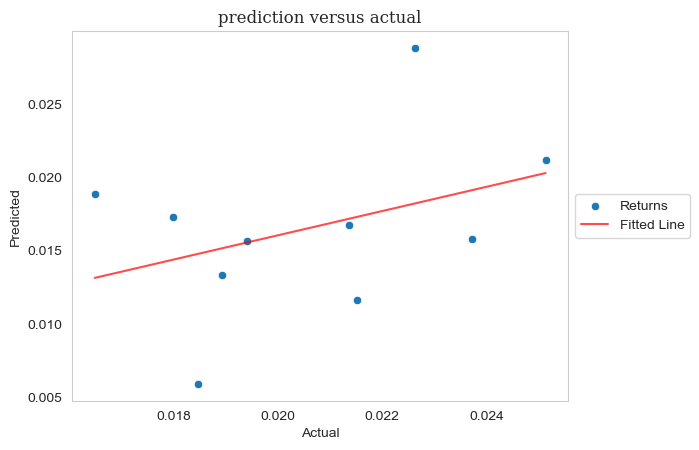

In [46]:
import seaborn as sns

beta, alpha = np.polyfit(x = y_test, y = y_pred , deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
sns.scatterplot(x = y_test , y = y_pred , label = 'Returns')
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'Fitted Line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('prediction versus actual', fontfamily = 'Serif')
plt.show()

In [47]:
import shap

explainer_randomforest_reg = shap.TreeExplainer(randomforest_reg)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)
shap_values_all = explainer_randomforest_reg(X)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


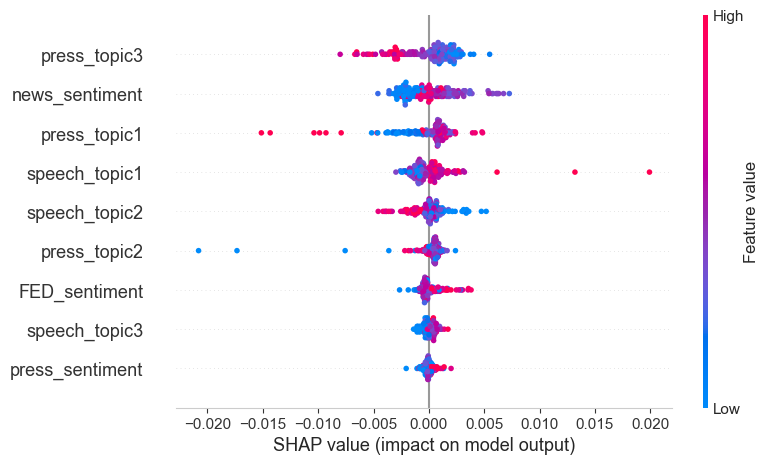

In [48]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train)

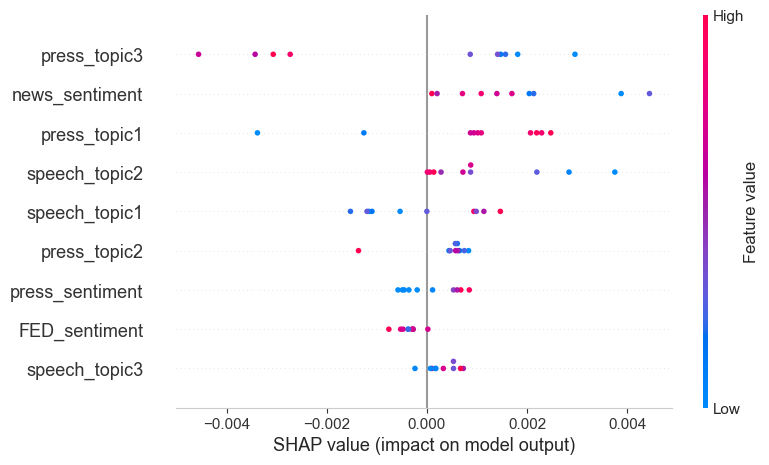

In [49]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test)

Text(0.5, 1.0, 'GDP forecast')

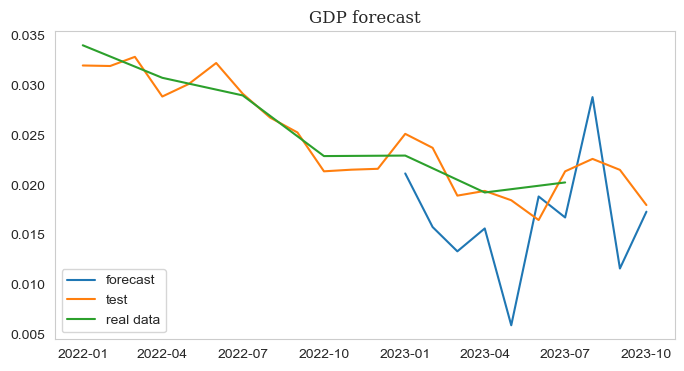

In [50]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred, index = y_test.index[-len(y_pred):]), label = 'forecast')
plt.plot(feature_matrix['gdp_rate'].loc['2022':], label = 'test')
plt.plot(gdp_rate.loc['2022':] / 3, label = 'real data')
plt.grid(False)
plt.legend()
plt.title('GDP forecast', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'GDP forecast')

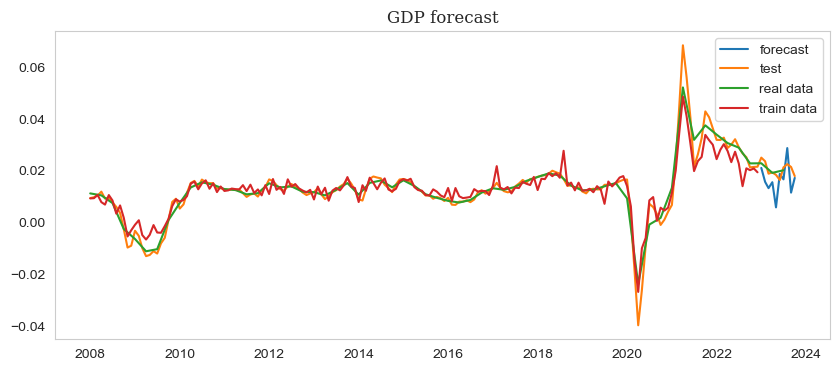

In [51]:
plt.figure(figsize = (10, 4))
plt.plot(pd.Series(y_pred, index = y_test.index[-len(y_pred):]), label = 'forecast')
plt.plot(feature_matrix['gdp_rate'], label = 'test')
plt.plot(gdp_rate.loc['2008':] / 3, label = 'real data')
plt.plot(pd.Series(
    randomforest_reg.predict(X_train),
    index = X_train.index
), 
         label = 'train data')
plt.grid(False)
plt.legend()
plt.title('GDP forecast', fontsize = 12, fontfamily = 'Serif')

모든 feature사용

In [52]:
X = feature_matrix.iloc[:,:-1]
y = feature_matrix['gdp_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False, random_state = 42)

randomforest_reg = RandomForestRegressor(n_estimators = 1000,
                                         random_state = 42,
                                         criterion = 'squared_error')
randomforest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [53]:
y_pred = randomforest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.5671289360730352e-05


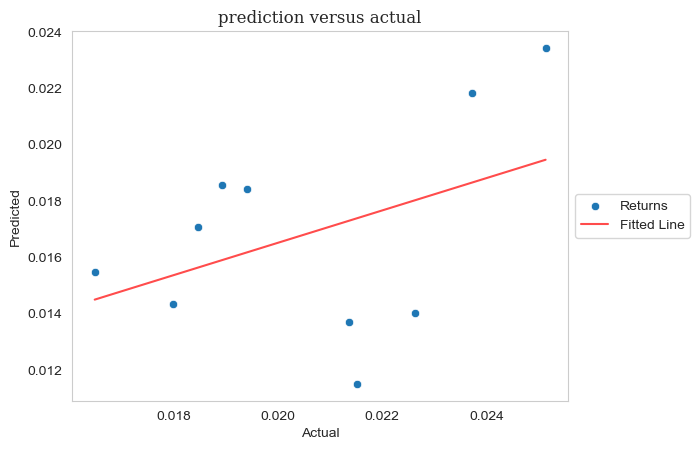

In [54]:
beta, alpha = np.polyfit(x = y_test, y = y_pred , deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
sns.scatterplot(x = y_test , y = y_pred , label = 'Returns')
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'Fitted Line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('prediction versus actual', fontfamily = 'Serif')
plt.show()

In [55]:
explainer_randomforest_reg = shap.TreeExplainer(randomforest_reg)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


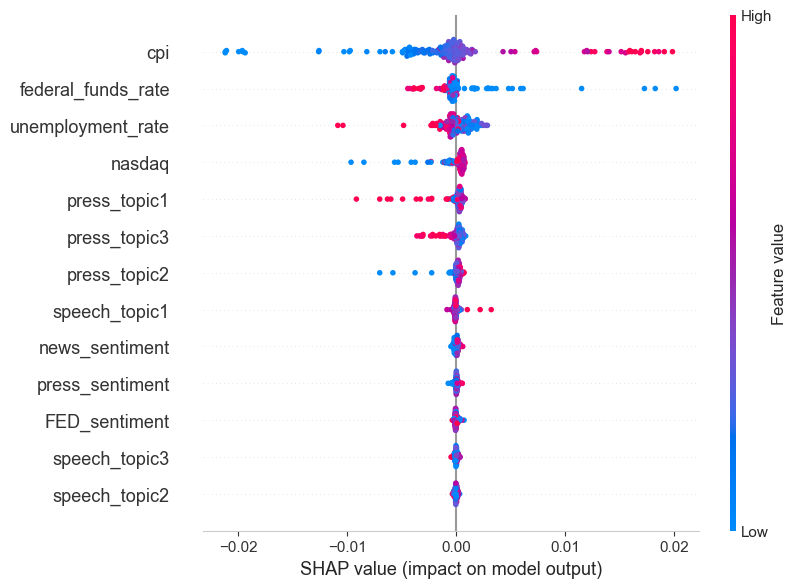

In [56]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

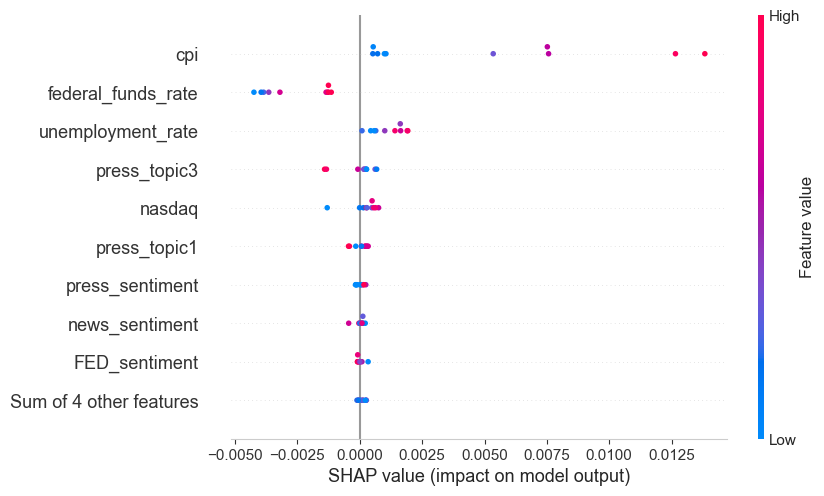

In [57]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test)

Text(0.5, 1.0, 'GDP forecast')

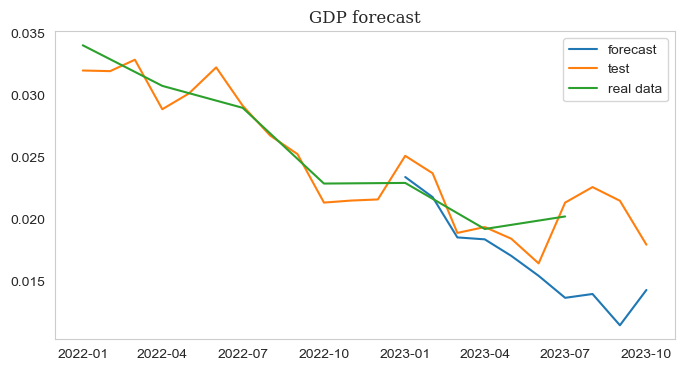

In [58]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred, index = y_test.index[-len(y_pred):]), label = 'forecast')
plt.plot(feature_matrix['gdp_rate'].loc['2022':], label = 'test')
plt.plot(gdp_rate.loc['2022':] / 3, label = 'real data')
plt.grid(False)
plt.legend()
plt.title('GDP forecast', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'GDP forecast')

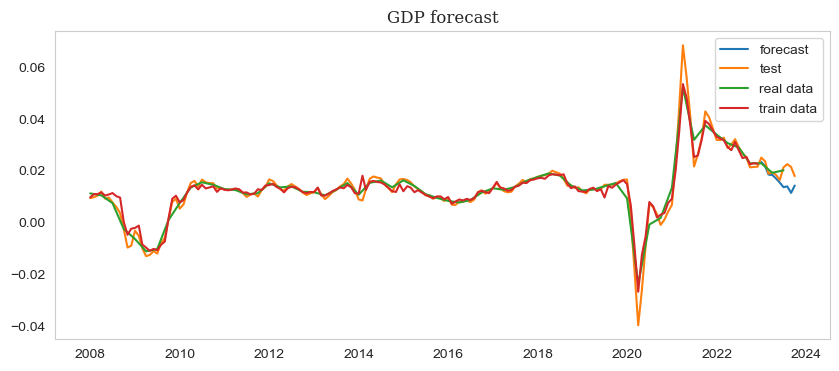

In [59]:
plt.figure(figsize = (10, 4))
plt.plot(pd.Series(y_pred, index = y_test.index[-len(y_pred):]), label = 'forecast')
plt.plot(feature_matrix['gdp_rate'], label = 'test')
plt.plot(gdp_rate.loc['2008':] / 3, label = 'real data')
plt.plot(pd.Series(
    randomforest_reg.predict(X_train),
    index = X_train.index
), 
         label = 'train data')
plt.grid(False)
plt.legend()
plt.title('GDP forecast', fontsize = 12, fontfamily = 'Serif')